In [1]:
# Подключение к Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
PATH = '/content/drive/My Drive/GU_neural_network/'

In [0]:
import sys
sys.path.append(PATH)

In [4]:
!pip install keras

## Практическое задание

<ol>
    <li>На выбор: либо обучить сверточную нейронную сеть на любом датасете, который не использовался на уроке, либо реализовать нейронную сеть AlexNet на любом датасете.
    </li>
</ol>

## Библотеки

In [5]:
import numpy as np
from keras.datasets import cifar10, cifar100
import keras
from keras.models import load_model
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.regularizers import l2

Using TensorFlow backend.


## Подготовка данных

In [0]:
np.random.seed(1)

## Подготовка и анализ моделей

### Модель

In [0]:
def lesson_model(name='lesson_model', img_shape=(224, 224, 3), n_classes=10, koeff=1, dense_nodes=512):
  # конфигурирование слоев нейросети
  model = Sequential(name=name)

  model.add(BatchNormalization(input_shape=img_shape))
  # слои нейросети отвественные за свертку и max-pooling
  model.add(Conv2D(32*koeff, (3, 3), padding='same',
                  input_shape=img_shape))
  model.add(Activation('relu'))
  model.add(Conv2D(32*koeff, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64*koeff, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64*koeff, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # полносвязные слои нейронной сети
  model.add(Flatten())
  model.add(Dense(dense_nodes))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes))
  model.add(Activation('softmax'))

  # инициализация RMSprop optimizer
  opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
     
  # компиляция модели
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  
  return model

Модификация модели

In [0]:
def lesson_modify_model(name='lesson_modify_model', img_shape=(224, 224, 3), n_classes=10, koeff=1, add_layer=1):
  # конфигурирование слоев нейросети
  model = Sequential(name=name)

  model.add(BatchNormalization(input_shape=img_shape))
  # слои нейросети отвественные за свертку и max-pooling
  model.add(Conv2D(32*koeff, (3, 3), padding='same',
                  input_shape=img_shape))
  model.add(Activation('relu'))
  model.add(Conv2D(32*koeff, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64*koeff, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64*koeff, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  for i in range(add_layer):
    model.add(Conv2D(64*koeff, (2, 2), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(Dropout(0.25))

  # полносвязные слои нейронной сети
  model.add(Flatten())
  model.add(Dense(2048))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes))
  model.add(Activation('softmax'))
     
  # компиляция модели
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  #model.summary()
  return model

Построение графиков обучения

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  fig = plt.figure()
  fig.set_size_inches(15, 15)

  ax_1 = fig.add_subplot(2, 2, 1)
  ax_2 = fig.add_subplot(2, 2, 2)
  ax_3 = fig.add_subplot(2, 2, 3)
  ax_4 = fig.add_subplot(2, 2, 4)


  for key in history.keys():
    ax_1.plot(history[key].history['accuracy'], label=key)
    ax_2.plot(history[key].history['val_accuracy'], label=key)
    ax_3.plot(history[key].history['loss'], label=key)
    ax_4.plot(history[key].history['val_loss'], label=key)

  ax_1.set(title = 'Model accuracy on train data', label='Accuracy', xlabel='Epoch')
  ax_1.legend(loc='lower right')
  ax_2.set(title = 'Model accuracy on test data', label='Accuracy', xlabel='Epoch')
  ax_2.legend(loc='lower right')
  ax_3.set(title = 'Model loss on train data', label='loss', xlabel='Epoch')
  ax_3.legend(loc='upper right')
  ax_4.set(title = 'Model loss on test data', label='loss', xlabel='Epoch')
  ax_4.legend(loc='upper right')

  plt.show()

Сравнение моделей

In [0]:
def analys_model(x_train, y_train, x_test, y_test, n_classes, epoch=10):
  models = []
  #models.append(AlexNET_model(img_shape=(32, 32, 3), n_classes=n_classes, use_koeff=False))
  #models.append(AlexNET_model_2(name='modify_alexnet', img_shape=(32, 32, 3), n_classes=n_classes, l2_value=0.0))
  models.append(lesson_model(name='lesson_model_1', img_shape=(32, 32, 3), n_classes=n_classes, koeff=1))
  models.append(lesson_model(name='lesson_model_3',img_shape=(32, 32, 3), n_classes=n_classes, koeff=3))
  #models.append(lesson_model(name='lesson_model_3_dense_max',img_shape=(32, 32, 3), n_classes=n_classes, koeff=3, dense_nodes=2048))
  models.append(lesson_modify_model(name='modify_model_1', img_shape=(32, 32, 3), n_classes=n_classes, koeff=1))
  models.append(lesson_modify_model(name='modify_model_3', img_shape=(32, 32, 3), n_classes=n_classes, koeff=3))
  models.append(lesson_modify_model(name='modify_model_5', img_shape=(32, 32, 3), n_classes=n_classes, koeff=5))
  #models.append(lesson_modify_model(name='modify_model_3_add_2', img_shape=(32, 32, 3), n_classes=n_classes, koeff=3, add_layer=3))

  history = {}

  for model in models:
      print(f'{model.name}')
      %time history[model.name] = model.fit(x_train, \
                      to_categorical(y_train), \
                      epochs=epoch, \
                      batch_size=2000,\
                      verbose=0, \
                      validation_data=(x_test, to_categorical(y_test))\
                      )

  return history

Обучение и сравнение моделей на датасете cifar10

In [0]:
select_list = ['lesson_model_1', 'lesson_model_3', 'modify_model_1',  'modify_model_3', 'modify_model_5']

lesson_model_1
CPU times: user 17.4 s, sys: 5.11 s, total: 22.5 s
Wall time: 27.3 s
lesson_model_3
CPU times: user 36.2 s, sys: 16.8 s, total: 53 s
Wall time: 1min 12s
modify_model_1
CPU times: user 17.6 s, sys: 4.66 s, total: 22.3 s
Wall time: 27 s
modify_model_3
CPU times: user 37.6 s, sys: 17.2 s, total: 54.9 s
Wall time: 1min 15s
modify_model_5
CPU times: user 1min 21s, sys: 46.6 s, total: 2min 8s
Wall time: 2min 50s


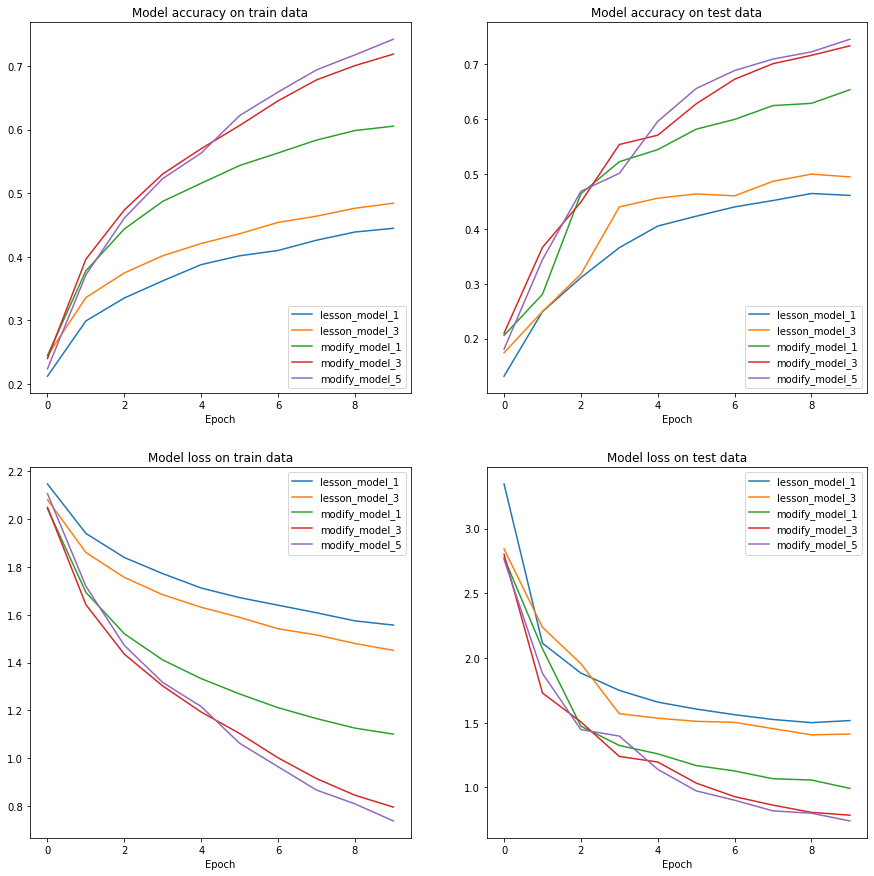

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
n_classes = 10
history = analys_model(x_train, y_train, x_test, y_test, n_classes, epoch=10)
filter_history = {k: v for k, v in history.items() if k in select_list}
plot_history(filter_history )

Обучение и сравнение моделей на датасете cifar100

lesson_model_1
CPU times: user 16.2 s, sys: 4.39 s, total: 20.6 s
Wall time: 25.5 s
lesson_model_3
CPU times: user 35.2 s, sys: 16 s, total: 51.2 s
Wall time: 1min 11s
modify_model_1
CPU times: user 17.9 s, sys: 4.59 s, total: 22.5 s
Wall time: 27.7 s
modify_model_3
CPU times: user 37.5 s, sys: 17.2 s, total: 54.7 s
Wall time: 1min 15s
modify_model_5
CPU times: user 1min 18s, sys: 45.1 s, total: 2min 4s
Wall time: 2min 46s


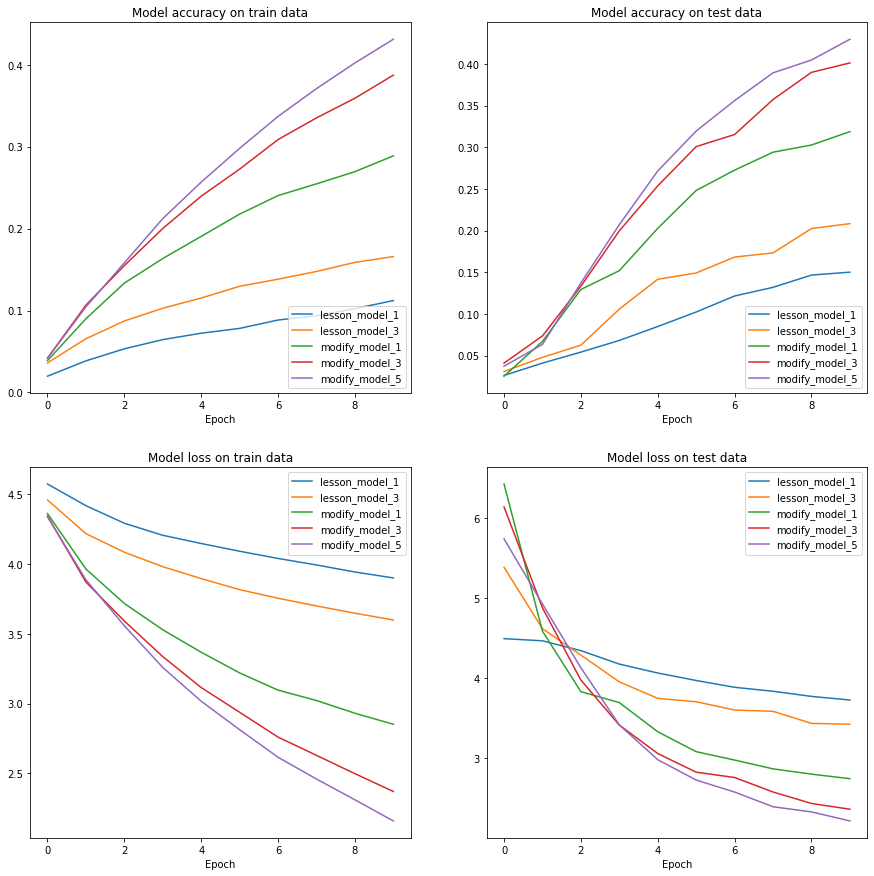

In [13]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
n_classes = 100
history = analys_model(x_train, y_train, x_test, y_test, n_classes, epoch=10)
filter_history = {k: v for k, v in history.items() if k in select_list}
plot_history(filter_history )